Illustration of Central Limit Theorem
------
https://en.wikipedia.org/wiki/Central_limit_theorem

**The distribution of measurements of the mean value of a random process converges to the normal distribution.**

Consider a process that produces a complicated distribution like the following:

In [1]:
import ROOT as R

Welcome to JupyROOT 6.24/02


In [2]:
tc = R.TCanvas()
tfDist=R.TF1("tfDist","sin(x)*sin(x)+exp(-x)*pow(2,x)",0,10,0)

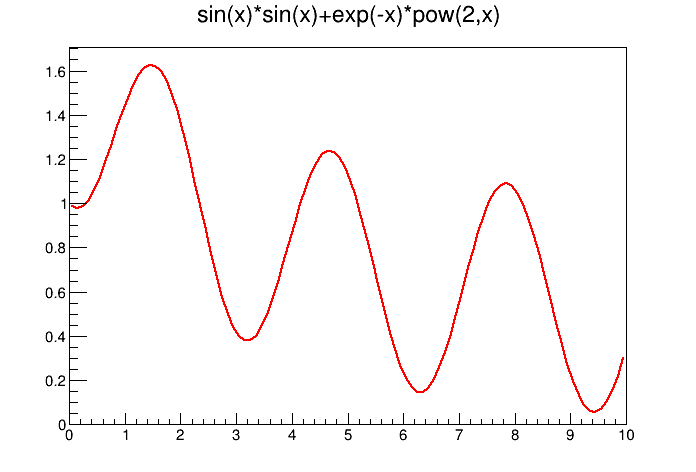

In [3]:
tfDist.Draw()
tc.Draw()

Here tfDist represents the **shape** of the PDF for some phenomena.  To make this a true PDF it will need to be normalized to unity.

We can randomly sample this distribution

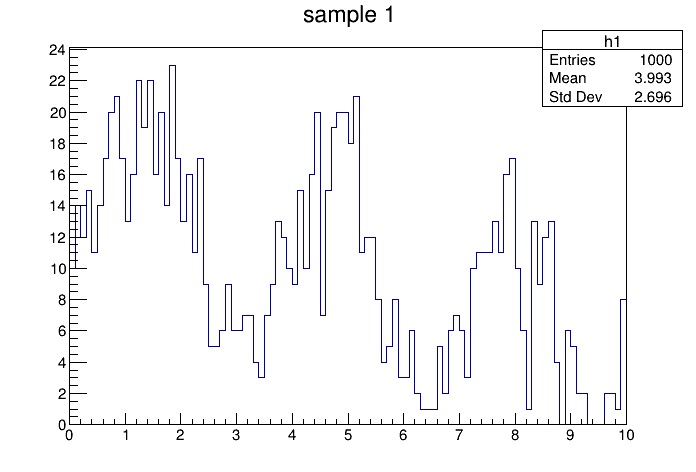

In [4]:
h1=R.TH1F("h1","sample 1",100, 0,10) # match range of our function
# fill 1000 times with a single sample from the PDF
h1.FillRandom("tfDist",1000)
h1.Draw()
tc.Draw()

Let's define an experiment to be:
- sampling the distribution N times per trial (N=1,2,10,100)
- recording the mean of these trials

Then repeat each version of the experiment many times and look at the distribution of these mean values

In [5]:
hmean1 = R.TH1F("hmean1","distribution of mean values 1 sample", 50, 0, 10);
hmean2 = R.TH1F("hmean2","distribution of mean values 2 samples", 50, 0, 10);
hmean10 = R.TH1F("hmean10","distribution of mean values 10 samples", 50, 0, 10);
hmean100 = R.TH1F("hmean100","distribution of mean values 100 samples", 100, 0, 10);
hmean1.SetLineColor(R.kBlack);
hmean2.SetLineColor(R.kRed);
hmean10.SetLineColor(R.kGreen);
hmean100.SetLineColor(R.kBlue);
tc4=R.TCanvas()
tc4.Divide(2,2)

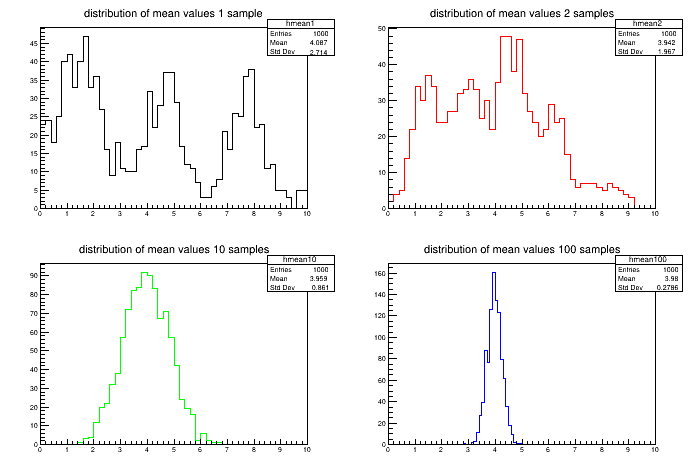

In [6]:
ntrials=1000;
hmean1.Reset(); hmean2.Reset(); hmean10.Reset(); hmean100.Reset()
for i in range(ntrials):
    # Experiment #1
    # For each trial: we sample the "PDF" 1 time, then save the distribution 
    # of the mean of the trial in the hmean1 histogram.
    # This histogram will simply sample the original PDF
    h1.Reset()    
    h1.FillRandom("tfDist",1)
    hmean1.Fill(h1.GetMean())
    
    # Experiment #2
    # For each trial: sample the "PDF" twice, then save the distribution
    # of the mean of the 2 samples.
    # Each trial will give us a very rough estimate of the mean of our distribution.
    h1.Reset()
    h1.FillRandom("tfDist",2)
    hmean2.Fill(h1.GetMean())
    
    # Experiment #3
    # For each trial: sample the "PDF" 10x, then save the distribution
    # of the mean of the 10 samples.
    # 10 random samples can be expected to give us a better estimate of the mean of
    # our distribution then in the above cases
    h1.Reset()
    h1.FillRandom("tfDist",10)
    hmean10.Fill(h1.GetMean())
    
    # Experiment #4
    # For each trial: sample the "PDF" 100x, then save the distribution
    # of the mean of the 10 samples.
    # 10 random samples can be expected to give us a better estimate of the mean of
    # our distribution then in the above cases
    h1.Reset()
    h1.FillRandom("tfDist",100)
    hmean100.Fill(h1.GetMean())

tc4.cd(1); hmean1.Draw()
tc4.cd(2); hmean2.Draw()
tc4.cd(3); hmean10.Draw()  # hmean10.Fit("gaus","q")
tc4.cd(4); hmean100.Draw() # hmean100.Fit("gaus","q") 
tc4.Draw()

* Top left (One samples per trial): Each trial is not a good estimate of the mean, the distribution of these trials just reproduces the PDF.
* Top right (Two samples per trial): Again, each trial is a poor estimate of a mean value for the distribution.
* Bottom left (10 samples per trial): Getting better, we see that the distribution of these trials is getting centered **symmetrically** around a mean value of ~4.
* Bottom Right(100 samples per trial): Very good, we have a symmetric and normally distributed result

Go ahead and change the function in the second cell to any other form and the results will be similar.  With sufficient sampling you will will find the "convergence of the mean to the normal distribution".  Note that we took only 10 samples in each trail and the results of our experiment are already closely approaching a normal distribution.

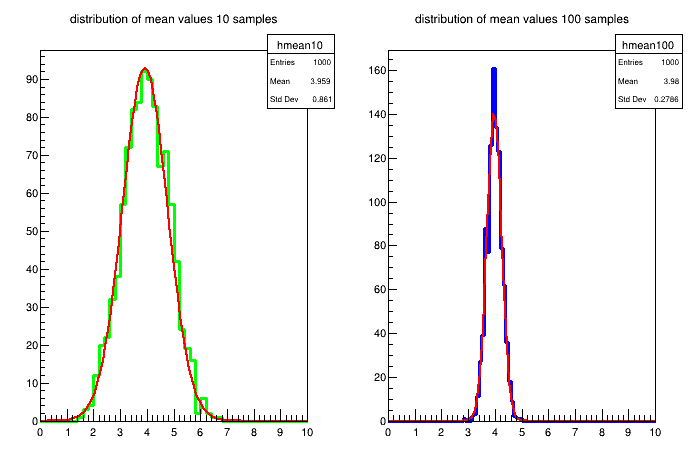

In [7]:
# Overlay a normal distribution
tc2=R.TCanvas()
tc2.Divide(2,1)
tc2.cd(1)
hmean10.SetLineWidth(3)
hmean10.Fit("gaus","q") 
tc2.cd(2)
hmean100.SetLineWidth(3)
hmean100.Fit("gaus","q") 
tc2.Draw()

The distribution of the results of these experiments are very consistent with a normal distribution1